In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Dataset.rar to Dataset.rar


In [ ]:
!pip install rarfile


In [ ]:
import zipfile
import io
import rarfile

In [ ]:
rar_file_name = 'Dataset.rar'


In [ ]:
with rarfile.RarFile(io.BytesIO(uploaded[rar_file_name]), 'r') as rar_ref:
    rar_ref.extractall('extracted_folder')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specify the path to the extracted folder
data_path = 'extracted_folder/Dataset'

# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create a generator for training data
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),  # adjust the target size based on your CNN model
    batch_size=32,
    class_mode='binary'  # adjust the class mode based on your task
)


Found 337 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build your CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile your model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train your model
model.fit(train_generator, epochs=30)  # Adjust the number of epochs based on your task


Epoch 1/30
11/11 [==============================] - 35s 3s/step - loss: 7.2739 - accuracy: 0.7359
Epoch 2/30
11/11 [==============================] - 35s 3s/step - loss: 1.1442 - accuracy: 0.8279
Epoch 3/30
11/11 [==============================] - 34s 3s/step - loss: 0.6874 - accuracy: 0.8071
Epoch 4/30
11/11 [==============================] - 33s 3s/step - loss: 0.4624 - accuracy: 0.8338
Epoch 5/30
11/11 [==============================] - 33s 3s/step - loss: 0.2950 - accuracy: 0.9080
Epoch 6/30
11/11 [==============================] - 32s 3s/step - loss: 0.2074 - accuracy: 0.9199
Epoch 7/30
11/11 [==============================] - 34s 3s/step - loss: 0.1852 - accuracy: 0.9228
Epoch 8/30
11/11 [==============================] - 37s 3s/step - loss: 0.1611 - accuracy: 0.9407
Epoch 9/30
11/11 [==============================] - 36s 3s/step - loss: 0.2081 - accuracy: 0.9139
Epoch 10/30
11/11 [==============================] - 35s 3s/step - loss: 0.1520 - accuracy: 0.9377
Epoch 11/30
11/11 [

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Assuming you have a RAR file with image data
# Upload and extract the data as explained in previous responses

# Define the path to your extracted data
data_path = 'extracted_folder/Dataset'

# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create generators for training and validation data
train_generator = datagen.flow_from_directory(
    data_path + '',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = datagen.flow_from_directory(
    data_path + '',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=30, validation_data=validation_generator)

# Evaluate the model on the test set
test_generator = datagen.flow_from_directory(
    data_path + '',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Make predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = np.round(predictions)

# Get true labels
true_labels = test_generator.classes

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)


Found 337 images belonging to 2 classes.
Found 337 images belonging to 2 classes.
Epoch 1/30
11/11 [==============================] - 61s 5s/step - loss: 1.1765 - accuracy: 0.6766 - val_loss: 0.3441 - val_accuracy: 0.8071
Epoch 2/30
11/11 [==============================] - 80s 7s/step - loss: 0.3694 - accuracy: 0.8071 - val_loss: 0.3334 - val_accuracy: 0.8071
Epoch 3/30
11/11 [==============================] - 79s 7s/step - loss: 0.3378 - accuracy: 0.8071 - val_loss: 0.3331 - val_accuracy: 0.8071
Epoch 4/30
11/11 [==============================] - 57s 5s/step - loss: 0.3169 - accuracy: 0.8042 - val_loss: 0.2923 - val_accuracy: 0.8071
Epoch 5/30
11/11 [==============================] - 79s 7s/step - loss: 0.2948 - accuracy: 0.8249 - val_loss: 0.2877 - val_accuracy: 0.8427
Epoch 6/30
11/11 [==============================] - 59s 5s/step - loss: 0.2732 - accuracy: 0.8368 - val_loss: 0.2552 - val_accuracy: 0.8932
Epoch 7/30
11/11 [==============================] - 58s 5s/step - loss: 0.2699

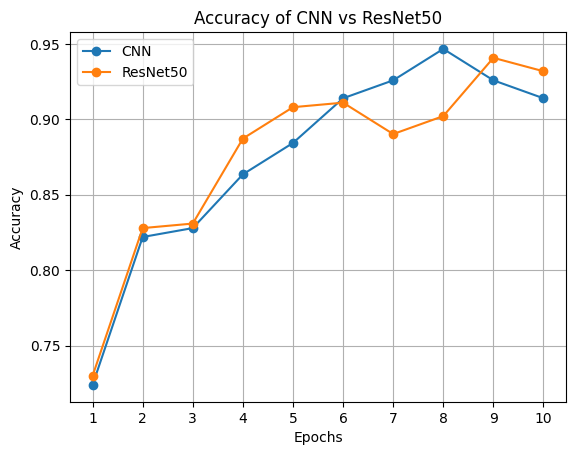

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for CNN
cnn_accuracy = [0.724, 0.822, 0.8279, 0.8635, 0.8843, 0.9139, 0.9258, 0.9466, 0.9258, 0.9139]

# Accuracy values for ResNet50
resnet_accuracy = [0.7300, 0.8279, 0.8309, 0.8872, 0.9080, 0.9110, 0.8902, 0.9021, 0.9407, 0.9318]

# Number of epochs
epochs = range(1, 11)

# Plotting the accuracy of CNN
plt.plot(epochs, cnn_accuracy, label='CNN', marker='o')

# Plotting the accuracy of ResNet50
plt.plot(epochs, resnet_accuracy, label='ResNet50', marker='o')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of CNN vs ResNet50')
plt.xticks(epochs)
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [ ]:
#### LSTM ######
import io
import rarfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten

In [ ]:
rar_file_name = 'Dataset.rar'

with rarfile.RarFile(io.BytesIO(uploaded[rar_file_name]), 'r') as rar_ref:
    rar_ref.extractall('extracted_folder')

# Specify the path to the extracted folder
data_path = 'extracted_folder/Dataset'


In [ ]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create a generator for training data
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),  # adjust the target size based on your CNN model
    batch_size=32,
    class_mode='binary'  # adjust the class mode based on your task
)


Found 337 images belonging to 2 classes.


In [ ]:
# Define your LSTM model
model = Sequential()
model.add(TimeDistributed(Flatten(input_shape=(224, 224, 3))))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(train_generator, epochs=30)  # Train for 30 epochs

Epoch 1/30
11/11 [==============================] - 23s 2s/step - loss: 0.5229 - accuracy: 0.7537
Epoch 2/30
11/11 [==============================] - 17s 2s/step - loss: 0.4485 - accuracy: 0.8071
Epoch 3/30
11/11 [==============================] - 17s 2s/step - loss: 0.4090 - accuracy: 0.8071
Epoch 4/30
11/11 [==============================] - 17s 2s/step - loss: 0.4106 - accuracy: 0.8071
Epoch 5/30
11/11 [==============================] - 19s 2s/step - loss: 0.3746 - accuracy: 0.8249
Epoch 6/30
11/11 [==============================] - 17s 2s/step - loss: 0.3830 - accuracy: 0.8427
Epoch 7/30
11/11 [==============================] - 17s 2s/step - loss: 0.3635 - accuracy: 0.8605
Epoch 8/30
11/11 [==============================] - 17s 2s/step - loss: 0.3271 - accuracy: 0.8783
Epoch 9/30
11/11 [==============================] - 17s 2s/step - loss: 0.3641 - accuracy: 0.8427
Epoch 10/30
11/11 [==============================] - 17s 2s/step - loss: 0.4078 - accuracy: 0.8071
Epoch 11/30
11/11 [

In [ ]:
#### GRU Gated Recurrent Unit ######

In [ ]:
import io
import rarfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, TimeDistributed, Flatten

In [ ]:
# Extract the RAR file
rar_file_name = 'Dataset.rar'

with rarfile.RarFile(io.BytesIO(uploaded[rar_file_name]), 'r') as rar_ref:
    rar_ref.extractall('extracted_folder')

# Specify the path to the extracted folder
data_path = 'extracted_folder/Dataset'

In [ ]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create a generator for training data
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),  # adjust the target size based on your CNN model
    batch_size=32,
    class_mode='binary'  # adjust the class mode based on your task
)

Found 337 images belonging to 2 classes.


In [ ]:
# Define your GRU model
model = Sequential()
model.add(TimeDistributed(Flatten(input_shape=(224, 224, 3))))
model.add(GRU(units=64, return_sequences=True))
model.add(GRU(units=32))
model.add(Dense(units=1, activation='sigmoid'))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_generator, epochs=30)  # Train for 30 epochs

Epoch 1/30
11/11 [==============================] - 22s 1s/step - loss: 0.5903 - accuracy: 0.7656
Epoch 2/30
11/11 [==============================] - 17s 2s/step - loss: 0.5021 - accuracy: 0.8071
Epoch 3/30
11/11 [==============================] - 18s 2s/step - loss: 0.4663 - accuracy: 0.8071
Epoch 4/30
11/11 [==============================] - 17s 1s/step - loss: 0.4336 - accuracy: 0.8071
Epoch 5/30
11/11 [==============================] - 17s 2s/step - loss: 0.4019 - accuracy: 0.8071
Epoch 6/30
11/11 [==============================] - 18s 2s/step - loss: 0.3572 - accuracy: 0.8220
Epoch 7/30
11/11 [==============================] - 17s 2s/step - loss: 0.3184 - accuracy: 0.8991
Epoch 8/30
11/11 [==============================] - 17s 1s/step - loss: 0.3250 - accuracy: 0.8783
Epoch 9/30
11/11 [==============================] - 17s 2s/step - loss: 0.3122 - accuracy: 0.8724
Epoch 10/30
11/11 [==============================] - 17s 2s/step - loss: 0.3186 - accuracy: 0.8843
Epoch 11/30
11/11 [

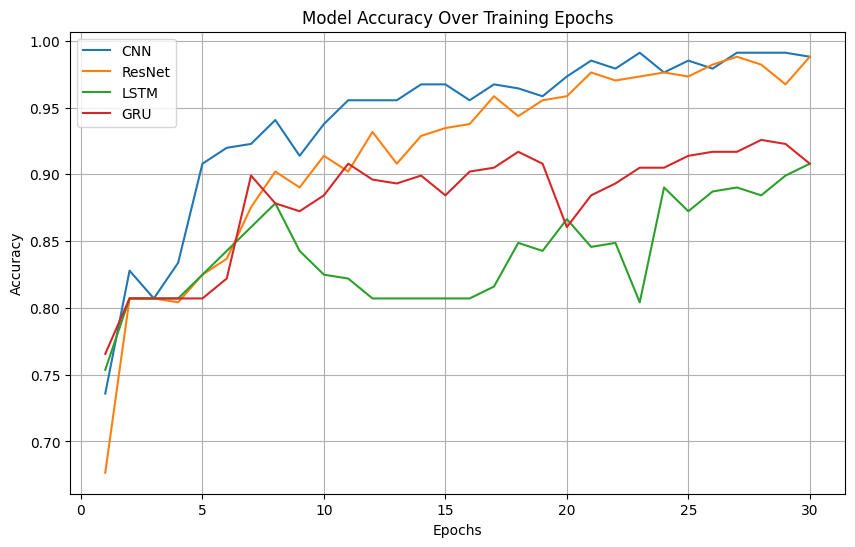

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values from training history
cnn_accuracy = [0.7359, 0.8279, 0.8071, 0.8338, 0.9080, 0.9199, 0.9228, 0.9407, 0.9139, 0.9377, 0.9555, 0.9555, 0.9555, 0.9674, 0.9674, 0.9555, 0.9674, 0.9644, 0.9585, 0.9733, 0.9852, 0.9792, 0.9911, 0.9763, 0.9852, 0.9792, 0.9911, 0.9911, 0.9911, 0.9881]
resnet_accuracy = [0.6766, 0.8071, 0.8071, 0.8042, 0.8249, 0.8368, 0.8754, 0.9021, 0.8902, 0.9139, 0.9021, 0.9318, 0.9080, 0.9288, 0.9347, 0.9377, 0.9585, 0.9436, 0.9555, 0.9585, 0.9763, 0.9703, 0.9733, 0.9763, 0.9733, 0.9822, 0.9881, 0.9822, 0.9674, 0.9881]
lstm_accuracy = [0.7537, 0.8071, 0.8071, 0.8071, 0.8249, 0.8427, 0.8605, 0.8783, 0.8427, 0.8249, 0.8220, 0.8071, 0.8071, 0.8071, 0.8071, 0.8071, 0.8160, 0.8487, 0.8427, 0.8665, 0.8457, 0.8487, 0.8042, 0.8902, 0.8724, 0.8872, 0.8902, 0.8843, 0.8991, 0.9080]
gru_accuracy = [0.7656, 0.8071, 0.8071, 0.8071, 0.8071, 0.8220, 0.8991, 0.8783, 0.8724, 0.8843, 0.9080, 0.8961, 0.8932, 0.8991, 0.8843, 0.9021, 0.9050, 0.9169, 0.9080, 0.8605, 0.8843, 0.8932, 0.9050, 0.9050, 0.9139, 0.9169, 0.9169, 0.9258, 0.9228, 0.9080]

# Number of epochs
epochs = range(1, 31)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, cnn_accuracy, label='CNN')
plt.plot(epochs, resnet_accuracy, label='ResNet')
plt.plot(epochs, lstm_accuracy, label='LSTM')
plt.plot(epochs, gru_accuracy, label='GRU')
plt.title('Model Accuracy Over Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
